In [92]:
import h5py
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import shap
import lightgbm as lgb 
import optuna
from optuna.samplers import TPESampler
from optuna.integration import LightGBMPruningCallback
from optuna.pruners import MedianPruner
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif, mutual_info_regression

In [93]:
# read data
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[-1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')
test  = load_data('test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

electron_truth = train['Truth']
y = train['p_truth_E']
y = y[electron_truth==1]
X = train[all_variables]
X = X[electron_truth==1]

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(train)


Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)
Shape of X: (121495, 160)
Shape of y: (121495,)
        eventNumber  runNumber  actualInteractionsPerCrossing  \
0        87834187.0   300000.0                      26.500000   
1        84862668.0   300000.0                      35.500000   
2        20869557.0   300000.0                      29.490000   
3        42161877.0   300000.0                      37.500000   
4        82761614.0   300000.0                      59.500000   
...             ...        ...                            ...   
162495   87753440.0   300000.0                      59.500000   
162496    7746045.0   300000.0                      11.490000   
162497   85994391.0   300000.0                      44.490002   
162498    9886827.0   300000.0                      20.490000   
162499   32505496.0   300000.0                      33.500000   

        averageInteractionsPerCrossing  correctedActualMu  correctedAverageMu  \
0         

(array([2.300e+01, 3.700e+01, 4.300e+01, 4.800e+01, 7.300e+01, 7.100e+01,
        7.200e+01, 9.800e+01, 1.100e+02, 1.080e+02, 1.180e+02, 1.420e+02,
        2.080e+02, 3.060e+02, 5.500e+02, 1.150e+03, 1.893e+03, 2.628e+03,
        3.276e+03, 3.919e+03, 4.654e+03, 5.267e+03, 5.680e+03, 5.702e+03,
        5.775e+03, 5.458e+03, 5.220e+03, 4.783e+03, 4.664e+03, 4.410e+03,
        4.305e+03, 4.048e+03, 3.861e+03, 3.710e+03, 3.511e+03, 3.474e+03,
        3.173e+03, 3.054e+03, 2.752e+03, 2.655e+03, 2.438e+03, 2.156e+03,
        1.982e+03, 1.847e+03, 1.750e+03, 1.555e+03, 1.357e+03, 1.208e+03,
        1.158e+03, 9.680e+02, 8.060e+02, 7.560e+02, 5.410e+02, 5.300e+02,
        4.170e+02, 3.110e+02, 2.310e+02, 1.610e+02, 1.120e+02, 6.600e+01,
        6.500e+01, 2.600e+01, 1.000e+01, 1.000e+01, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

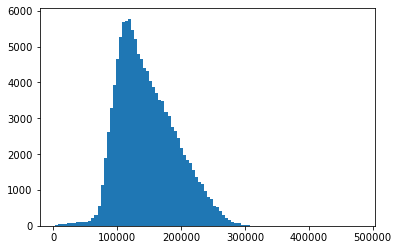

In [94]:
range = np.arange(np.size(X))

plt.hist(y, bins=100)

In [95]:
def selection_features(X_train, y_train, X_test):
    select = SelectKBest(score_func=f_regression, k=12)
    select.fit(X_train, y_train)
    
    return select

In [96]:
select = selection_features(X_train, y_train, X_test)

